In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd


In [ ]:
# 2. Load the dataset

datum=pd.read_csv('/Churn_Modelling.csv')

In [ ]:
# Visualize the data

datum.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#  3. Perform Below Visualizations.
#  Univariate Analysis

datum['CreditScore'].value_counts

<bound method IndexOpsMixin.value_counts of 0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64>

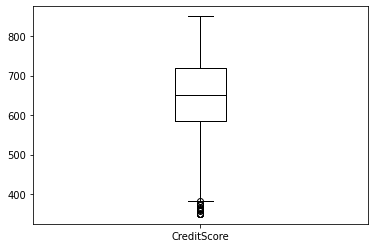

In [ ]:
import matplotlib.pyplot as plt

datum.boxplot(column=['CreditScore'], grid=False, color='black')

Text(0, 0.5, 'Tenure')

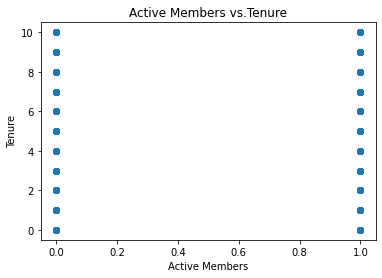

In [ ]:
# Bivariate Analysis

import matplotlib.pyplot as plot
plot.scatter(datum.IsActiveMember, datum.Tenure)
plot.title('Active Members vs.Tenure')
plot.xlabel('Active Members')
plot.ylabel('Tenure')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


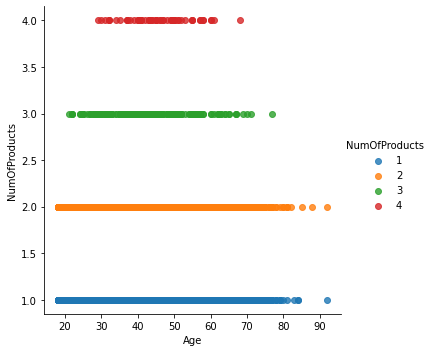

In [ ]:
# Multi-variate Analysis

sns.lmplot("Age","NumOfProducts",datum,hue="NumOfProducts",fit_reg=False);

In [16]:
import statistics as st

In [13]:
# 4. Descriptive Statistics
nums=[2,3,4,5,6,7]
st.mean(nums)


4.5

In [15]:
# Mode
nums=[2,3,4,5,6,7,8,9,1,5,0]
st.mode(nums)

5

In [17]:
# Median
st.median(nums) 

5

In [ ]:
# 5. Handle Missing Values
datum.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


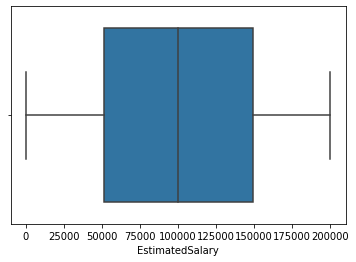

In [ ]:
# 6. Finding outliers
sns.boxplot(datum['EstimatedSalary'],data=datum)

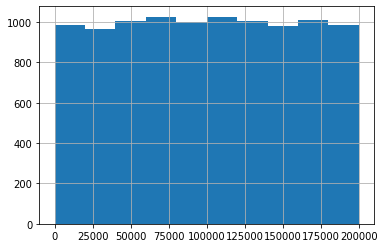

In [ ]:
datum['EstimatedSalary'].hist()

In [ ]:
print('skewness value of Age: ',datum['Age'].skew())
print('skewness value of EstimatedSalary	: ',datum['EstimatedSalary'].skew())

skewness value of Age:  1.0113202630234552
skewness value of EstimatedSalary	:  0.0020853576615585162


In [ ]:
Q1 = datum['EstimatedSalary'].quantile(0.85)
Q3 = datum['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = datum[(datum['EstimatedSalary'] < Q1 - whisker_width*IQR) | (datum['EstimatedSalary'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Prints Outliers
fare_mean = datum['EstimatedSalary'].mean()
fare_std = datum['EstimatedSalary'].std()
low= fare_mean -(1 * fare_std)
high= fare_mean + (1 * fare_std)
fare_outliers = datum[(datum['EstimatedSalary'] < low) | (datum['EstimatedSalary'] > high)]
fare_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0


In [ ]:
# Replace the Outliers
Q1 = datum['EstimatedSalary'].quantile(0.85)
Q3 = datum['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 2.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
datum['EstimatedSalary']=np.where(datum['EstimatedSalary']>upper_whisker,upper_whisker,np.where(datum['EstimatedSalary']<lower_whisker,lower_whisker,datum['EstimatedSalary']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


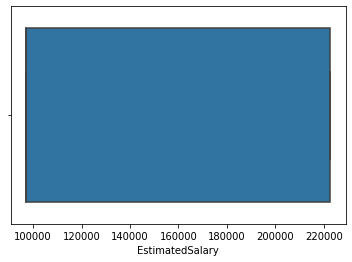

In [ ]:
sns.boxplot(datum['EstimatedSalary'],data=datum)

In [ ]:
Q1 = datum['EstimatedSalary'].quantile(0.25)
Q3 = datum['EstimatedSalary'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 2.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=datum['EstimatedSalary'][(datum['EstimatedSalary']>upper_whisker)|(datum['EstimatedSalary']<lower_whisker)].index
datum.drop(index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


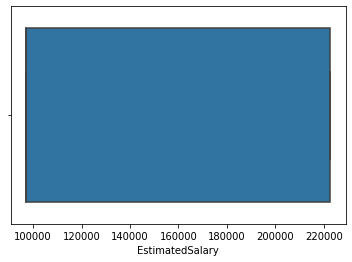

In [ ]:
sns.boxplot(datum['EstimatedSalary'],data=datum)

In [ ]:
# 7. Check for Categorical Columns
datum._get_numeric_data()

NameError: ignored

In [ ]:
cols = datum.columns

In [ ]:
num_cols = datum._get_numeric_data().columns

In [ ]:
num_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
list(set(cols) - set(num_cols))

['Surname', 'Gender', 'Geography']

In [ ]:
# 8. Split the data into Independent and Dependent variables

x=datum.iloc[:,0:4].values
y=datum.iloc[:,4:5].values

In [ ]:
# 9. Scale the Independent variable

import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
datum = pandas.read_csv("/Churn_Modelling.csv")
X = datum[['Age', 'EstimatedSalary']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[ 0.29351742  0.02188649]
 [ 0.19816383  0.21653375]
 [ 0.29351742  0.2406869 ]
 ...
 [-0.27860412 -1.00864308]
 [ 0.29351742 -0.12523071]
 [-1.04143285 -1.07636976]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
# 10. Split the data into Training and Testing

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)